## Ising Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Benedict\AppData\Local\Temp\ipykernel_28324\1093387796.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


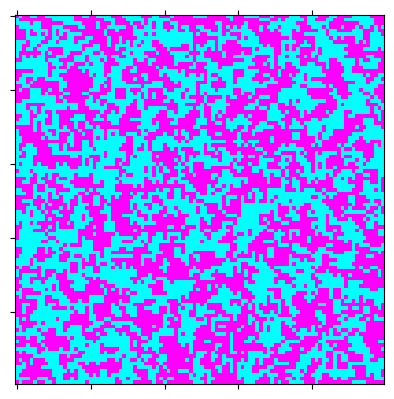

In [2]:
# Initialize RNG
rng = np.random.default_rng()


def roll(lattice):
    left_shift = np.roll(lattice, 1, axis=1) # shifts lattice leftward
    up_shift= np.roll(lattice, 1, axis=0) # shifts upward 
    right_shift = np.roll(lattice, -1, axis=1) # shifts lattice leftward
    down_shift = np.roll(lattice, -1, axis=0) # shifts upward 
    
    return left_shift, up_shift, right_shift, down_shift


def ising_model(J, h, beta, N, init_p, mc_iters):
    # How does this work?
    ising_lattice = np.sign(rng.random(size=(N,N)) - init_p)
    energy_list = []

    # To be used on total energy calculation
    left, up, right, down = roll(ising_lattice) # use our roll function to shorten the code
    total_energy = -J*np.sum(ising_lattice*(left+up)) - h*np.sum(ising_lattice)
    energy_list.append(total_energy)
    
    for i in range(mc_iters):
        ## Pick a random spin in the lattice
        # pick_x, pick_y = ....
        # sample: pos_x, pos_y = rng.integers(N, size=2)
        pos_x, pos_y = rng.integers(N, size=2)
        site_spin = ising_lattice[pos_x, pos_y]
        

        ## Compute the change in energy
        # Define total_energy of the flip
        
        # Here, we define the E_new - E_old
        delta_argument = np.roll(ising_lattice, 1, axis=1)[pos_x, pos_y] + np.roll(ising_lattice, 1, axis=0)[pos_x, pos_y]
        + np.roll(ising_lattice, -1, axis=1)[pos_x, pos_y]+ np.roll(ising_lattice, -1, axis=0)[pos_x, pos_y]
        # delta_argument = ising_lattice[(pos_x+1)%N, pos_y] + ising_lattice[(pos_x-1), pos_y] 
        # + ising_lattice[pos_x, (pos_y+1)%N] + ising_lattice[pos_x, (pos_y-1)] 
        delta_energy = 2*J*site_spin*(delta_argument)

        # config_p:
        config_p = np.exp(-beta*delta_energy) # For configuration spin
        number = rng.random()
        
        # if delta_energy > 0:
            # if number < config_p : # generate a random number
            #     * apply the spin flip to [pick_x, pick_y]
                # ising_lattice[pos_x, pos_y] = -1*site_spin
                # total_energy += delta_energy
        # elif delta_energy < 0:
            # ising_lattice[pos_x, pos_y] = -1*site_spin
            # total_energy += delta_energy
        # else:
            # ising_lattice[pos_x, pos_y] = site_spin
            # total_energy = total_energy # Take it as constant

        if rng.random() < config_p:
          ising_lattice[pos_x, pos_y] = -site_spin
        else:
          delta_energy = 0

        ## Record the relevant stuff
        total_energy = total_energy - delta_energy
        energy_list.append(total_energy)

        
        ## Record the relevant stuff
            # energy_list.append(total_energy)
    
    return ising_lattice, energy_list


### SAMPLE 

N = 100 # Number of spins in one side -> N x N afterwards
init_p = 0.5 # Approx. how many spin-up/down present at start
mc_iters = N*N*10 # i.e., do approx. 10 passes through all N^2 spins

# We map [ising_lattice, energy_list] to [sample_out, sample_energ]
sample_out, sample_energ = ising_model(J=1, h=0, beta=1.0, N=N, init_p=init_p, mc_iters=mc_iters)

## -- Visualization -- ##
fig, ax = plt.subplots()
ax.matshow(sample_out, cmap="cool") 
# Remove tick labels
ax.set(xticklabels=[], yticklabels=[])
fig.show()
# print(sample_energ)

C:\Users\Benedict\AppData\Local\Temp\ipykernel_28324\832743356.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


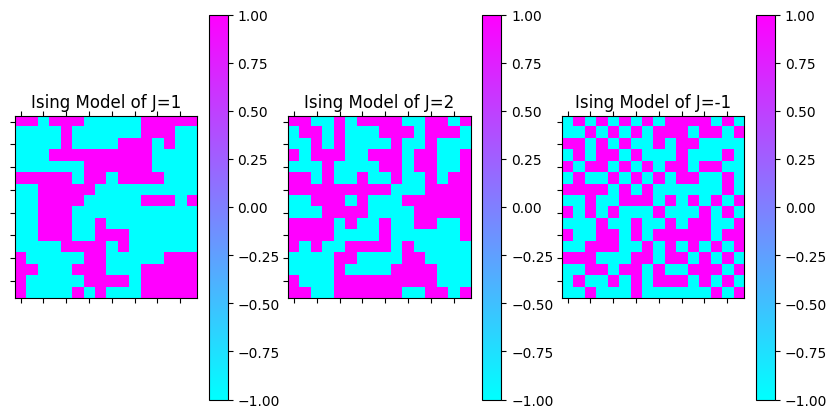

In [3]:
## Initial Case
N = 16
J_init = 1
J_pos= 2 # Greater than 0
J_neg= -1
beta=1.0
h=0
init_p = 0.5
sweeps=200 # Modify this
mc_iters = sweeps*N**2

## Define the Evolution Matrix which is basically just our Ising Model
ising_lat, energy_list = ising_model(J=J_init, h=0, beta=1, N=N, init_p=init_p, mc_iters=mc_iters)
ising_lat_ferro, energy_list_ferro = ising_model(J=J_pos, h=0, beta=1, N=N, init_p=init_p, mc_iters=mc_iters)
ising_lat_anti, energy_list_anti = ising_model(J=J_neg, h=0, beta=1, N=N, init_p=init_p, mc_iters=mc_iters)

## Sample energy_list
# Define filtering function
# def heat_cap(T, array):
#     k = len(array) # To disambiguate with N, the length of the array
#     skip = 50
#     array_filtered = np.copy(array[k//4::skip]) # start at the middle
#     ## After filtering, do heat capacity
#     squared_mean = np.mean(array_filtered**2)
#     mean = np.mean(array_filtered)
#     C = (squared_mean - mean**2)/(k**2*T**2)
#     return C




# We map [ising_lattice, energy_list] to [sample_out, sample_energ]
# sample_out, sample_energ = ising_model(J=1, h=0, beta=1.0, N=N, init_p=init_p, mc_iters=mc_iters)

## 

## -- Visualization -- ##
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].matshow(ising_lat, cmap="cool")
ax[0].set_title('Ising Model of J=1')
ax[0].set(xticklabels=[], yticklabels=[])
ax[1].set_title('Ising Model of J=2')
ax[1].matshow(ising_lat_ferro, cmap="cool")
ax[1].set(xticklabels=[], yticklabels=[])
ax[2].matshow(ising_lat_anti, cmap="cool")
ax[2].set_title('Ising Model of J=-1')
ax[2].set(xticklabels=[], yticklabels=[])
fig.colorbar(ax[0].matshow(ising_lat, cmap="cool"))
fig.colorbar(ax[1].matshow(ising_lat_ferro, cmap="cool"))
fig.colorbar(ax[2].matshow(ising_lat_anti, cmap="cool"))
# Remove tick labels  
fig.show()
fig.savefig("Spin_Model.pdf")



## Conductivity Plots
Now, we'll be using our defined Conducitivity function to plot conductance as a function of temperatire in our Ising Model

C:\Users\Benedict\AppData\Local\Temp\ipykernel_28324\2462607197.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


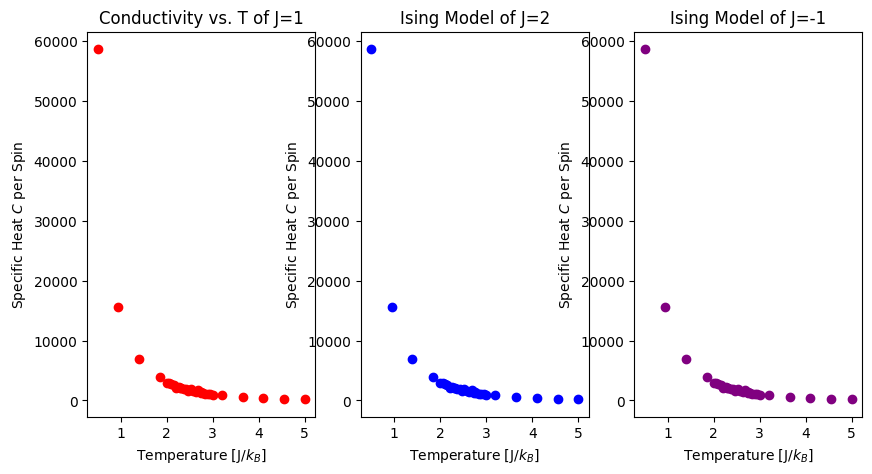

In [5]:
## We compose the heat conducitivities to prepare for plotting
# But before that, we define the array of temperatures
temp_space = sorted(set().union(np.linspace(0.5, 5, 11), np.linspace(2, 3, 20)))
# Now, the containers of our ordinates
c_init = []
c_pos = []
c_neg = []
# fill up c_init
# for T in temp_space:
#     c_init.append(heat_cap(T=T, array=energy_list)) # recall the lists of energy we have defined in each Ising model
#     c_pos.append(heat_cap(T=T, array=energy_list_ferro))
#     c_neg.append(heat_cap(T=T, array=energy_list_anti))

# T_all = np.linspace(1.5, 3.5, 20)
c_init = []
c_pos = []
c_neg = []
for T in temp_space:
  beta = 1.0/T
  sample_out, sample_energy = ising_model(J=1, h=0, N=16, beta=beta, init_p=0.5, mc_iters=sweeps*N*N)
  c_init.append(np.var(sample_energy[(-(sweeps//4)*N**2)::(N**2)])/((N**2)*(T**2)))
  sample_out_pos, sample_energy_pos = ising_model(J=2, h=0, N=16, beta=beta, init_p=0.5, mc_iters=sweeps*N*N)  
  c_pos.append(np.var(sample_energy[(-(sweeps//4)*N**2)::(N**2)])/((N**2)*(T**2)))
  sample_out_neg, sample_energy_neg = ising_model(J=-1, h=0, N=16, beta=beta, init_p=0.5, mc_iters=sweeps*N*N)
  c_neg.append(np.var(sample_energy[(-(sweeps//4)*N**2)::(N**2)])/((N**2)*(T**2)))

# Plot scatterplots
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].scatter(temp_space, c_init, color='red')
ax[0].set_title('Conductivity vs. T of J=1')
ax[0].set_xlabel("Temperature [J/$k_B$]")
ax[0].set_ylabel("Specific Heat $C$ per Spin")
ax[1].set_title('Ising Model of J=2')
ax[1].scatter(temp_space, c_pos, color='blue')
ax[1].set_xlabel("Temperature [J/$k_B$]")
ax[1].set_ylabel("Specific Heat $C$ per Spin")
ax[2].scatter(temp_space, c_neg, color='purple')
ax[2].set_title('Ising Model of J=-1')
ax[2].set_xlabel("Temperature [J/$k_B$]")
ax[2].set_ylabel("Specific Heat $C$ per Spin")
# Remove tick labels  
fig.show()
fig.savefig("Conductivity.pdf")
